# Data Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rawData = "/content/drive/MyDrive/DataScience/M5/CD - M5 AE6 - temps.csv"

data = pd.read_csv(rawData)

data = data.drop(['year','forecast_noaa',	'forecast_acc',	'forecast_under'], axis=1)
data

,month,day,week,temp_2,temp_1,average,actual,friend
0,1,1,Fri,45,45,45.6,45,29
1,1,2,Sat,44,45,45.7,44,61
2,1,3,Sun,45,44,45.8,41,56
3,1,4,Mon,44,41,45.9,40,53
4,1,5,Tues,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...
343,12,27,Tues,42,42,45.2,47,47
344,12,28,Wed,42,47,45.3,48,58
345,12,29,Thurs,47,48,45.3,48,65
346,12,30,Fri,48,48,45.4,57,42


#Analisis Descriptivo

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    348 non-null    int64  
 1   day      348 non-null    int64  
 2   week     348 non-null    object 
 3   temp_2   348 non-null    int64  
 4   temp_1   348 non-null    int64  
 5   average  348 non-null    float64
 6   actual   348 non-null    int64  
 7   friend   348 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 21.9+ KB


In [ ]:
data.describe()

,month,day,temp_2,temp_1,average,actual,friend
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


Faltan 17 datos, y hay datos maximos de temp_1 y temp_2

In [ ]:
data = data.drop(data[data['temp_1'] > 100].index)
data = data.drop(data[data['temp_2'] > 100].index)
data.describe()

,month,day,temp_2,temp_1,average,actual,friend
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,6.453757,15.511561,62.488439,62.554913,59.790173,62.569364,60.026012
std,3.494824,8.723856,11.842744,11.796273,10.550556,11.822949,15.670961
min,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,3.000000,8.000000,54.000000,54.000000,49.925000,54.000000,47.250000
50%,6.000000,15.000000,62.000000,62.500000,58.350000,63.000000,60.000000
75%,10.000000,23.000000,71.000000,71.000000,69.075000,71.000000,71.000000
max,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [ ]:
data.head()

,month,day,week,temp_2,temp_1,average,actual,friend
0,1,1,Fri,45,45,45.6,45,29
1,1,2,Sat,44,45,45.7,44,61
2,1,3,Sun,45,44,45.8,41,56
3,1,4,Mon,44,41,45.9,40,53
4,1,5,Tues,41,40,46.0,44,41


In [ ]:
data.tail()

,month,day,week,temp_2,temp_1,average,actual,friend
343,12,27,Tues,42,42,45.2,47,47
344,12,28,Wed,42,47,45.3,48,58
345,12,29,Thurs,47,48,45.3,48,65
346,12,30,Fri,48,48,45.4,57,42
347,12,31,Sat,48,57,45.5,40,57


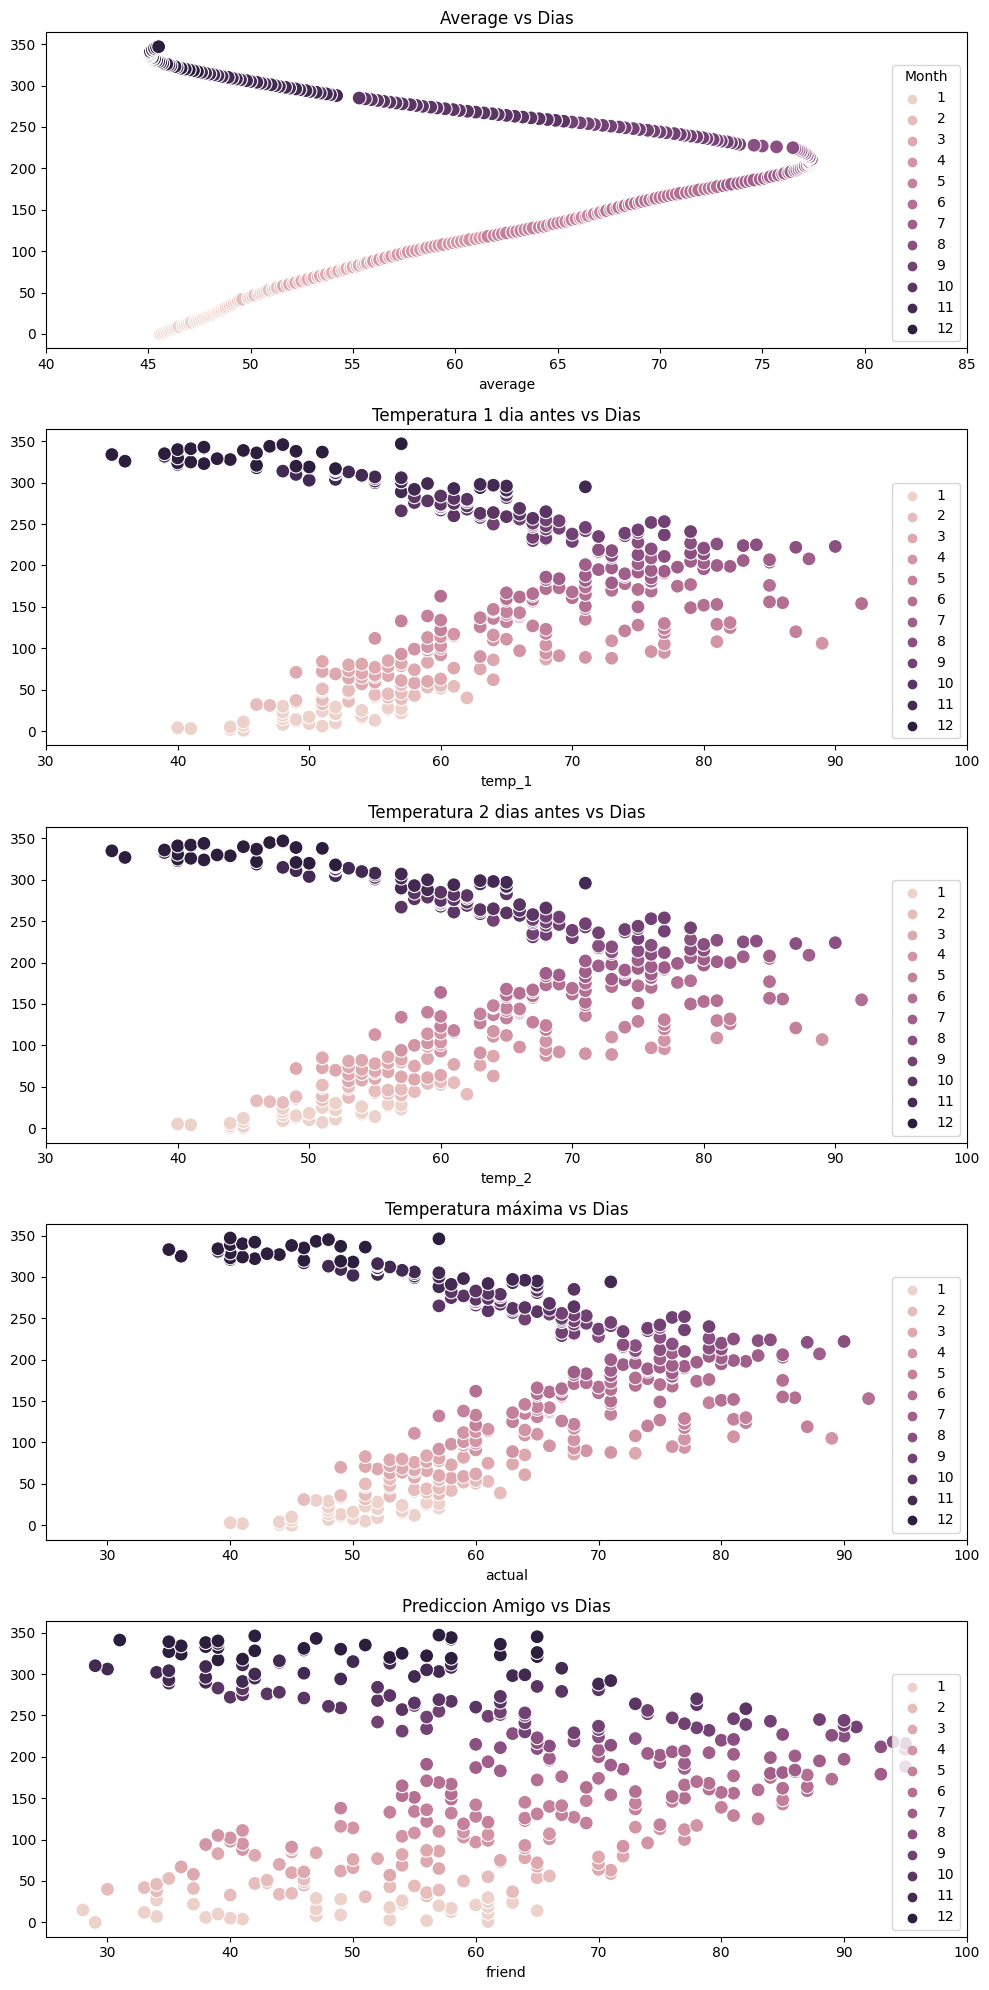

In [ ]:
fig, axe = plt.subplots(5,1, figsize=(10,20))

sns.scatterplot(data=data, x='average', y=data.index, hue='month', legend='full', s=100, ax=axe[0])
axe[0].legend(loc='lower right', title='Month')
axe[0].set_xlim(40, 85)
axe[0].set_title("Average vs Dias")

sns.scatterplot(data=data, x='temp_1', y=data.index, hue='month', legend='full', s=100, ax=axe[1])
axe[1].legend(loc='lower right')
axe[1].set_xlim(30, 100)
axe[1].set_title("Temperatura 1 dia antes vs Dias")

sns.scatterplot(data=data, x='temp_2', y=data.index, hue='month', legend='full', s=100, ax=axe[2])
axe[2].legend(loc='lower right')
axe[2].set_xlim(30, 100)
axe[2].set_title("Temperatura 2 dias antes vs Dias")

sns.scatterplot(data=data, x='actual', y=data.index, hue='month', legend='full', s=100, ax=axe[3])
axe[3].legend(loc='lower right')
axe[3].set_xlim(25, 100)
axe[3].set_title("Temperatura máxima vs Dias")

sns.scatterplot(data=data, x='friend', y=data.index, hue='month', legend='full', s=100, ax=axe[4])
axe[4].legend(loc='lower right')
axe[4].set_xlim(25, 100)
axe[4].set_title("Prediccion Amigo vs Dias")

plt.tight_layout()
plt.show()

Se confirma la perdida de datos
Datos de Friendo son mas dispersos en comparacion a los demas, que son similares entre si, siendo que los datos actuales difieren un poco con las temp 1 y 2

# Preparacion de data

In [ ]:
data = pd.get_dummies(data, columns=['week'])
display(data)

,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,12,27,42,42,45.2,47,47,0,0,0,0,0,1,0
344,12,28,42,47,45.3,48,58,0,0,0,0,0,0,1
345,12,29,47,48,45.3,48,65,0,0,0,0,1,0,0
346,12,30,48,48,45.4,57,42,1,0,0,0,0,0,0


In [ ]:
data = data.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 347
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       346 non-null    float64
 1   day         346 non-null    float64
 2   temp_2      346 non-null    float64
 3   temp_1      346 non-null    float64
 4   average     346 non-null    float64
 5   actual      346 non-null    float64
 6   friend      346 non-null    float64
 7   week_Fri    346 non-null    float64
 8   week_Mon    346 non-null    float64
 9   week_Sat    346 non-null    float64
 10  week_Sun    346 non-null    float64
 11  week_Thurs  346 non-null    float64
 12  week_Tues   346 non-null    float64
 13  week_Wed    346 non-null    float64
dtypes: float64(14)
memory usage: 40.5 KB


In [ ]:
X = data.drop(['actual'], axis=1)
y = data['actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state = 42)

In [ ]:
tempMax = np.mean(y_train)

baseline = np.full_like(y_test, tempMax)
mse = mean_squared_error(y_test, baseline)

print(f"La linea de base tiene un error cuadratico medio de {mse}, lo que se podria interpretar que las temperaturas varian en los diferentes dias del año, obteniendo asi este altisimo resultado en el error")

La linea de base tiene un error cuadratico medio de 138.16912884303366, lo que se podria interpretar que las temperaturas varian en los diferentes dias del año, obteniendo asi este altisimo resultado en el error


# Ajuste del Modelo

In [ ]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

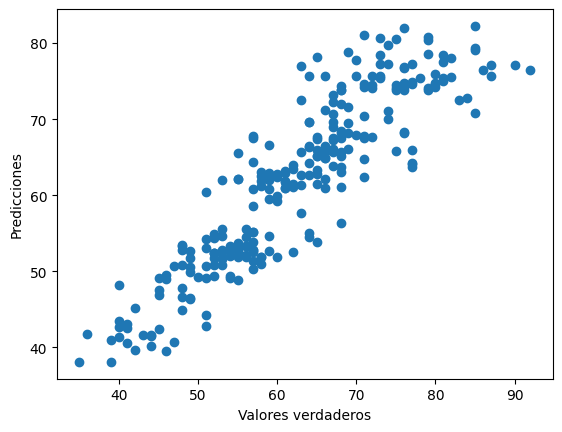

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores verdaderos')
plt.ylabel('Predicciones')
plt.show()

La prediccion visualizada, se observa una tendencia lineal entre los datos reales (y_test) y los datos predichos (y_pred).

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)
print(r2)


27.00618319615384
5.196747366974254
0.8044065115983567


En cuanto a las metricas obtenidas...

El MSE fue de 27.0, lo que significa que en promedio las preddiciones difieren 27.0 unidades del valor real.

El RMSE fue de 5.19, lo que significa que las predicciones difieren 2.49 unidades del valor real.

Y el R2 es de un 0.80, que nos indica que el modelo se ajusta bien, debido a que es cercano a 1.

En general, el modelo de Random Forest realizado, predice valores precisos y que es adecuado para este conjunto de datos, pero que podria mejorar ajusto algunos hiperparametros o cambiando la variable respuesta a "average", la cual se obtuvo un mejor R2, de un 0.94, en un testeo de prueba con esta variable.

